In [4]:
library(naturalsort)
library(data.table)
library(data.tree)
library(Biostrings)
library(fields)
dataDir <- '../../Data/simout050718_1/'

In [25]:
flst<-list.files(dataDir) # Get list of files from directory
flst <- naturalsort(flst) # Natural sort the files
nclst <- c() # Total number of cells for each simulation
ncls <- c() # Number of cells for each genotype
rs <- c() # Division rate for each genotype
gns <- c()

nGeno <- c() # Number of genotypes for each simulation

for (i in 1:25) { # Loop over files
    load(paste0(dataDir,flst[i])) # Load the current simulation output file
    nGeno[i] <- CellPop$totalCount # Get number of genotypes in population (number of L1 insertions)
    if (CellPop$totalCount==1) { # If the genotype tree has 1 node
        ncls[[i]] <- CellPop$ncells[length(CellPop$ncells)]
    }
    else {
        ncls[[i]] <- vapply(CellPop$Get('ncells'),tail,n=1L,FUN.VALUE = numeric(1))
    }
    nclst[[i]] <- N # Get total number of cells
    gns[[i]] <- gn # Get list of hit genes
    rs[[i]] <- CellPop$Get('B') # Get the division rates of all nodes
    rm('CellPop','gn','N')
    
}

In [26]:
# Function for computing mode value
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [27]:
rs_var <- c()
rs_mean <- c()
rs_max <- c()
# cellPs_var <- c()
# cellPs_mean <- c()
ncls_var <- c()

for (i in 1:length(rs)) {
    
    if (length(rs[[i]])==1) {rs_var[i] <- 0}
#     if (length(cellPs[[i]])==1) {cellPs_var[i] <- 0}
    
    else {
        rs_var[i] <- var(rs[[i]])
        rs_mean[i] <- mean(rs[[i]])
        rs_max[i] <- max(rs[[i]])
#         cellPs_var[i] <- var(cellPs[[i]])
#         cellPs_mean[i] <- mean(cellPs[[i]])
    }
    ncls_var[i] <- var(ncls[[i]])

}

In [28]:
norml <- function(x) {
    x = (x-min(x))/(max(x)-min(x))
    return(x)}

In [29]:
nclsot <- nclst
nclst <- lapply(nclst,tail,n=1)

In [30]:
matrix(nclst[1:25],nrow=5,ncol=5,byrow=TRUE)

65536,65536,65533,65087,62553
65536,65536,65536,65179,61449
65536,65536,65534,65230,57497
65537,65537,65536,63283,62241
65657,65628,65632,65507,63511


In [31]:
matrix(rs_mean[1:25],nrow=5,ncol=5,byrow=TRUE)

1.000000,0.9999393,0.9986572,0.9934904,0.9869803
1.000002,0.9999518,0.9993822,0.9931795,0.9864077
1.000021,0.9999493,0.9992651,0.9934585,0.9864301
1.000266,1.0002156,0.9995705,0.9854628,0.9885621
1.003580,1.0023443,1.0020976,0.9974370,0.9901191


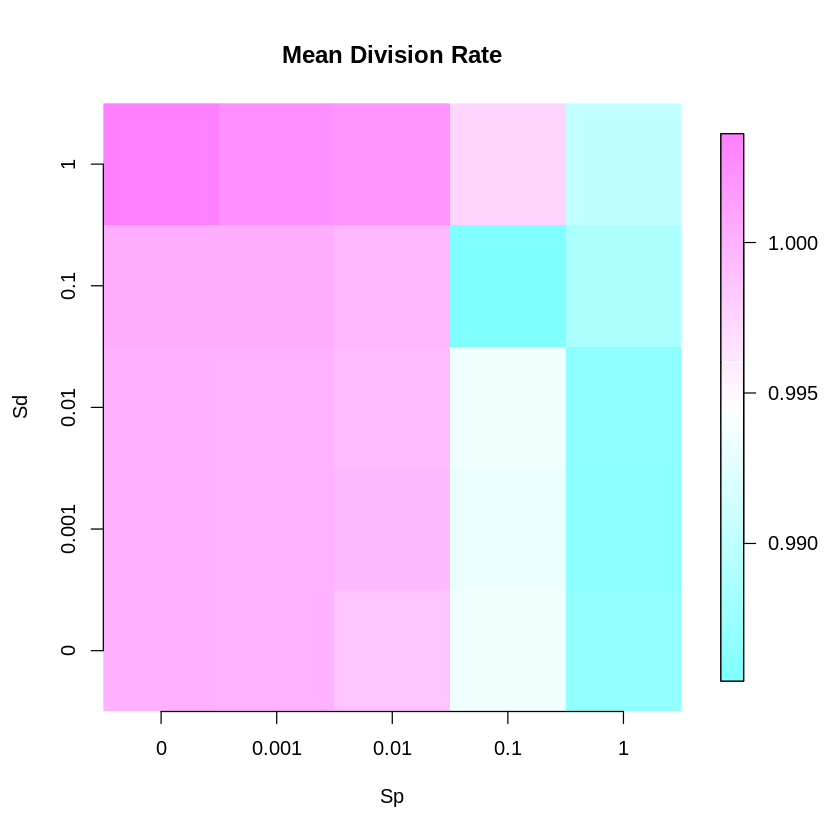

In [39]:
rotate <- function(x) t(apply(x, 2, rev))

image.plot(rotate(apply(matrix(rs_mean[1:25],nrow=5,ncol=5,byrow=TRUE),2,rev)),axes=F,col=cm.colors(256))

title(main="Mean Division Rate",xlab='Sp',ylab='Sd');
axis(1, at=seq(0,1,0.25), labels=c(0.0,0.001,0.01,0.1,1.0)); 
axis(2, at=seq(0,1,0.25), labels=c(0.0,0.001,0.01,0.1,1.0)); 

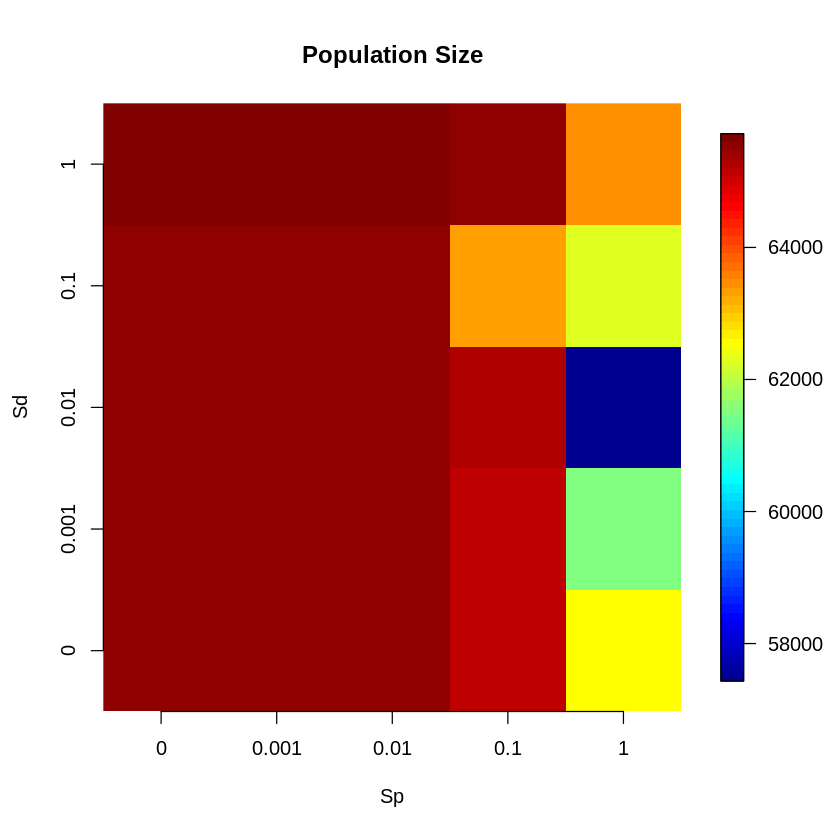

In [43]:
rotate <- function(x) t(apply(x, 2, rev))

image.plot(rotate(apply(matrix(unlist(nclst[1:25]),nrow=5,ncol=5,byrow=TRUE),2,rev)),axes=F)

title(main="Population Size",xlab='Sp',ylab='Sd');
axis(1, at=seq(0,1,0.25), labels=c(0.0,0.001,0.01,0.1,1.0)); 
axis(2, at=seq(0,1,0.25), labels=c(0.0,0.001,0.01,0.1,1.0)); 

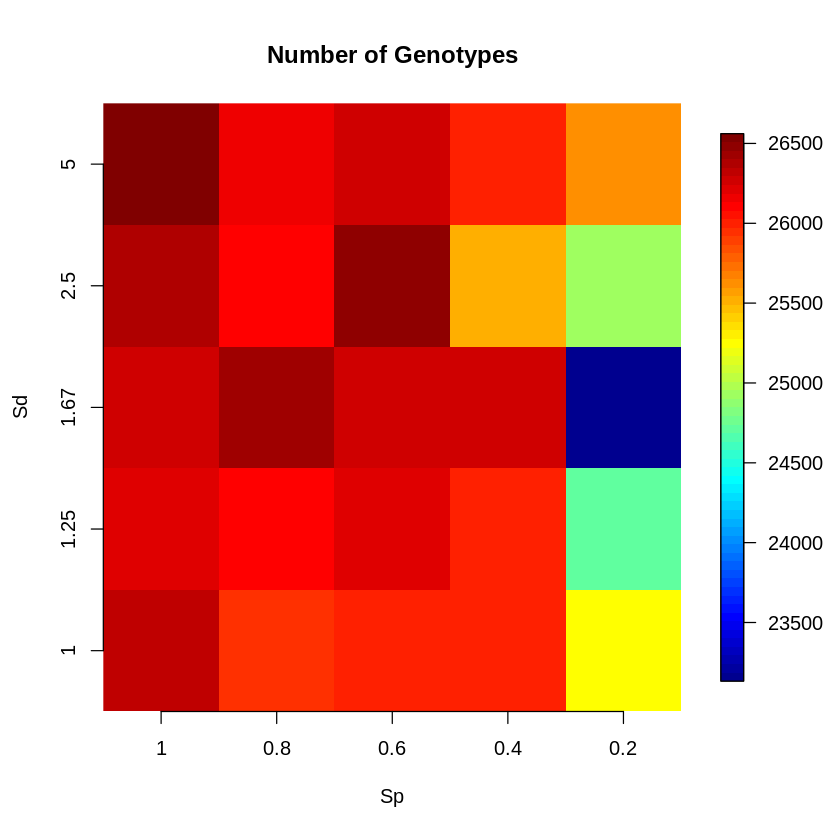

In [44]:
rotate <- function(x) t(apply(x, 2, rev))

image.plot(rotate(apply(matrix(nGeno[1:25],nrow=5,ncol=5,byrow=TRUE),2,rev)),axes=F)

title(main="Number of Genotypes",xlab='Sp',ylab='Sd');
axis(1, at=seq(0,1,0.25), labels=seq(1.0,0.2,-0.2)); 
axis(2, at=seq(0,1,0.25), labels=c(1.00,1.25,1.67,2.50,5.00)); 

In [55]:
length(2^c(0:16))
length(nclsot[[15]])

[1] 17

[1] 17

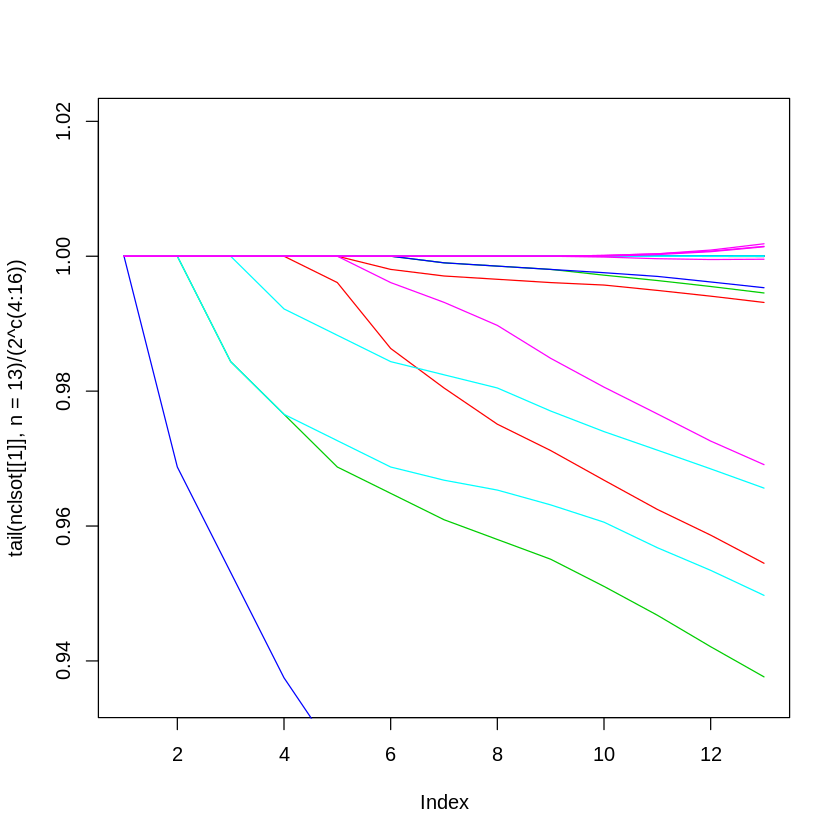

In [104]:
plot(tail(nclsot[[1]],n=13)/(2^c(4:16)),type='n',ylim=c(0.935,1.02))
# plot(tail(nclsot[[1]],n=13))
# cols = c(rep(c(2:6),5))
cols = c(2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5,6,6,6,6,6)
for (i in 1:25) {
    lines(tail(nclsot[[i]],n=13)/(2^c(4:16)),col=cols[i])
#     lines(tail(nclsot[[i]],n=13))
}

In [107]:
save(nclsot,nclst,ncls,rs,gns,file='~/Desktop/out0507_1.rda')